In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb

plt.rcParams['figure.figsize'] = (15.0, 10.0)

In [2]:
data_chemicals = pd.read_csv("chemicals.csv", encoding = "utf-8")
data_drought = pd.read_csv("droughts.csv", encoding = "utf-8")
data_education = pd.read_csv("education_attainment.csv", encoding = "latin1")

## Pollution index by county

In [3]:
data_chemicals['greater_than_MCL'] = (data_chemicals['contaminant_level'] == "Greater than MCL") * 1.
groups = data_chemicals.groupby("cws_name")[['greater_than_MCL', 'fips', "pop_served"]].mean()
groups['index_with_weights'] = groups['greater_than_MCL']*groups['pop_served']
groups['fips'] = groups['fips'].astype(int)
chemicals_index = groups.groupby("fips")['index_with_weights'].sum() / groups.groupby("fips")['pop_served'].sum()

In [4]:
chemicals_index

fips
6001     0.000000
6003     0.000000
6005     0.000000
6007     0.002989
6009     0.000000
6011     0.021261
6013     0.000290
6015     0.000413
6017     0.000318
6018     0.406780
6019     0.003126
6021     0.000317
6023     0.000000
6025     0.000000
6027     0.014376
6029     0.028546
6031     0.071114
6033     0.001236
6035     0.001203
6037     0.001596
6039     0.034914
6041     0.000210
6043     0.000800
6045     0.011587
6047     0.002166
6049     0.000000
6051     0.031347
6053     0.002903
6055     0.020527
6057     0.002446
           ...   
55083    0.006026
55085    0.000000
55087    0.010251
55089    0.000108
55091    0.015381
55093    0.000000
55095    0.014491
55097    0.000074
55099    0.000000
55101    0.000053
55103    0.000000
55105    0.000269
55107    0.000000
55109    0.000121
55111    0.000616
55113    0.000000
55115    0.002077
55117    0.000184
55119    0.000000
55121    0.005379
55123    0.000000
55125    0.000000
55127    0.001080
55129    0.000000
55131

## Drought index by county

In [5]:
data_drought['valid_start'] = pd.to_datetime(data_drought['valid_start'])
data_drought['valid_end'] = pd.to_datetime(data_drought['valid_end'])

In [6]:
data_drought['event_duration_in_days'] = (data_drought['valid_end'] - data_drought['valid_start']).dt.days

In [7]:
data_drought['event_importance_with_weight'] = data_drought['event_duration_in_days'] * 0. + (data_drought['d0']*1. + data_drought['d1']*2. + data_drought['d2']*3. + data_drought['d3']*4. + data_drought['d4']*5.) / 100.
groups = data_drought.groupby("fips")
drought_index = groups['event_importance_with_weight'].sum() / groups['event_duration_in_days'].sum()

In [8]:
data_drought

,fips,county,state,none,d0,d1,d2,d3,d4,valid_start,valid_end,event_duration_in_days,event_importance_with_weight
0,2013,Aleutians East Borough,AK,100.00,0.00,0.0,0.0,0.0,0.0,2017-12-26,2018-01-01,6,0.0000
1,2013,Aleutians East Borough,AK,100.00,0.00,0.0,0.0,0.0,0.0,2017-12-19,2017-12-25,6,0.0000
2,2013,Aleutians East Borough,AK,100.00,0.00,0.0,0.0,0.0,0.0,2017-12-12,2017-12-18,6,0.0000
3,2013,Aleutians East Borough,AK,100.00,0.00,0.0,0.0,0.0,0.0,2017-12-05,2017-12-11,6,0.0000
4,2013,Aleutians East Borough,AK,100.00,0.00,0.0,0.0,0.0,0.0,2017-11-28,2017-12-04,6,0.0000
5,2013,Aleutians East Borough,AK,100.00,0.00,0.0,0.0,0.0,0.0,2017-11-21,2017-11-27,6,0.0000
6,2013,Aleutians East Borough,AK,100.00,0.00,0.0,0.0,0.0,0.0,2017-11-14,2017-11-20,6,0.0000
7,2013,Aleutians East Borough,AK,100.00,0.00,0.0,0.0,0.0,0.0,2017-11-07,2017-11-13,6,0.0000
8,2013,Aleutians East Borough,AK,100.00,0.00,0.0,0.0,0.0,0.0,2017-10-31,2017-11-06,6,0.0000
9,2013,Aleutians East Borough,AK,100.00,0.00,0.0,0.0,0.0,0.0,2017-10-24,2017-10-30,6,0.0000


In [9]:
drought_index

fips
1001     0.145533
1003     0.143284
1005     0.234105
1007     0.119415
1009     0.109820
1011     0.206507
1013     0.151655
1015     0.138964
1017     0.272743
1019     0.125913
1021     0.137915
1023     0.087852
1025     0.112923
1027     0.223499
1029     0.173111
1031     0.191757
1033     0.089665
1035     0.163774
1037     0.194750
1039     0.190085
1041     0.178382
1043     0.094834
1045     0.213561
1047     0.103573
1049     0.109051
1051     0.213187
1053     0.166651
1055     0.106476
1057     0.096223
1059     0.080830
           ...   
72095    0.052976
72097    0.010433
72099    0.006119
72101    0.034560
72103    0.040788
72105    0.061053
72107    0.036815
72109    0.083343
72111    0.027675
72113    0.035986
72115    0.008658
72117    0.008761
72119    0.049147
72121    0.013492
72123    0.141241
72125    0.009403
72127    0.053814
72129    0.069353
72131    0.002986
72133    0.101331
72135    0.051546
72137    0.037743
72139    0.071403
72141    0.005447
72143

## Education index by county

In [10]:
data_education

,fips,state,county,year,less_than_hs,hs_diploma,some_college_or_associates,college_bachelors_or_higher,pct_less_than_hs,pct_hs_diploma,pct_college_or_associates,pct_college_bachelors_or_higher,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,0,US,United States,1970,52373312.0,34158051.0,11650730.0,11717266.0,47.7,31.1,10.6,10.7,NaN,NaN,NaN
1,1000,AL,Alabama,1970,1062306.0,468269.0,136287.0,141936.0,58.7,25.9,7.5,7.8,NaN,NaN,NaN
2,1001,AL,Autauga County,1970,6611.0,3757.0,933.0,767.0,54.8,31.1,7.7,6.4,NaN,NaN,NaN
3,1003,AL,Baldwin County,1970,18726.0,8426.0,2334.0,2038.0,59.4,26.7,7.4,6.5,NaN,NaN,NaN
4,1005,AL,Barbour County,1970,8120.0,2242.0,581.0,861.0,68.8,19.0,4.9,7.3,NaN,NaN,NaN
5,1007,AL,Bibb County,1970,5272.0,1402.0,238.0,302.0,73.1,19.4,3.3,4.2,NaN,NaN,NaN
6,1009,AL,Blount County,1970,10677.0,3440.0,626.0,404.0,70.5,22.7,4.1,2.7,NaN,NaN,NaN
7,1011,AL,Bullock County,1970,4245.0,958.0,305.0,314.0,72.9,16.5,5.2,5.4,NaN,NaN,NaN
8,1013,AL,Butler County,1970,8353.0,2459.0,499.0,541.0,70.5,20.7,4.2,4.6,NaN,NaN,NaN
9,1015,AL,Calhoun County,1970,30535.0,13804.0,3823.0,3921.0,58.6,26.5,7.3,7.5,NaN,NaN,NaN


In [11]:
data_education['avg_higher_education_years'] = (data_education['pct_less_than_hs'] * (-3) + data_education['pct_hs_diploma'] * 0. + data_education['pct_college_or_associates']*3. + data_education['pct_college_bachelors_or_higher']*4.)/100.

In [12]:
education_index = data_education.groupby('fips')['avg_higher_education_years'].mean()

In [13]:
education_index

fips
0        0.62980
1000     0.16280
1001     0.24360
1003     0.42620
1005    -0.49040
1007    -0.73880
1009    -0.43880
1011    -0.78380
1013    -0.50900
1015     0.06940
1017    -0.50660
1019    -0.57000
1021    -0.57160
1023    -0.55500
1025    -0.35060
1027    -0.59380
1029    -0.80640
1031     0.19220
1033    -0.01880
1035    -0.67420
1037    -0.71880
1039    -0.39000
1041    -0.69020
1043    -0.34980
1045     0.47040
1047    -0.14700
1049    -0.69260
1051     0.06500
1053    -0.41200
1055    -0.03620
          ...   
72095   -0.82200
72097   -0.33100
72099   -0.80925
72101   -0.80925
72103   -0.74450
72105   -0.70300
72107   -1.05500
72109   -0.69900
72111   -0.68925
72113   -0.08750
72115   -0.69775
72117   -0.96150
72119   -0.34000
72121   -0.47200
72123   -0.60375
72125   -0.42400
72127    0.58150
72129   -0.80500
72131   -0.91775
72133   -0.54525
72135   -0.05500
72137    0.00725
72139    0.52600
72141   -0.81875
72143   -0.66500
72145   -0.57400
72147   -0.90850
72149   -

In [14]:
len(data_chemicals['fips'].unique())

1500

In [15]:
chemicals_index

fips
6001     0.000000
6003     0.000000
6005     0.000000
6007     0.002989
6009     0.000000
6011     0.021261
6013     0.000290
6015     0.000413
6017     0.000318
6018     0.406780
6019     0.003126
6021     0.000317
6023     0.000000
6025     0.000000
6027     0.014376
6029     0.028546
6031     0.071114
6033     0.001236
6035     0.001203
6037     0.001596
6039     0.034914
6041     0.000210
6043     0.000800
6045     0.011587
6047     0.002166
6049     0.000000
6051     0.031347
6053     0.002903
6055     0.020527
6057     0.002446
           ...   
55083    0.006026
55085    0.000000
55087    0.010251
55089    0.000108
55091    0.015381
55093    0.000000
55095    0.014491
55097    0.000074
55099    0.000000
55101    0.000053
55103    0.000000
55105    0.000269
55107    0.000000
55109    0.000121
55111    0.000616
55113    0.000000
55115    0.002077
55117    0.000184
55119    0.000000
55121    0.005379
55123    0.000000
55125    0.000000
55127    0.001080
55129    0.000000
55131

## Analysis

In [16]:
data_with_indices = pd.DataFrame({'drought': drought_index, 'chemicals': chemicals_index, 'education': education_index})

In [17]:
data_with_indices

,drought,chemicals,education
fips,,,
0,NaN,NaN,0.62980
1000,NaN,NaN,0.16280
1001,0.145533,NaN,0.24360
1003,0.143284,NaN,0.42620
1005,0.234105,NaN,-0.49040
1007,0.119415,NaN,-0.73880
1009,0.109820,NaN,-0.43880
1011,0.206507,NaN,-0.78380
1013,0.151655,NaN,-0.50900


In [18]:
data_with_indices = data_with_indices.dropna()

In [19]:
data_with_indices['drought_normalized'] = (data_with_indices['drought'] - data_with_indices['drought'].mean()) /data_with_indices['drought'].std()
data_with_indices['chemicals_normalized'] = (data_with_indices['chemicals'] - data_with_indices['chemicals'].mean()) /data_with_indices['chemicals'].std()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


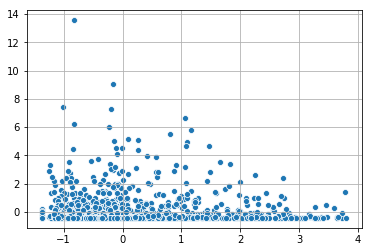

In [20]:
sns.scatterplot(data_with_indices['drought_normalized'].values, data_with_indices['chemicals_normalized'].values)
plt.grid()

In [21]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data_with_indices[['drought_normalized', 'chemicals_normalized']].values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [22]:
kmeans.labels_

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

ValueError: c of shape (1504,) not acceptable as a color sequence for x with size 0, y with size 0

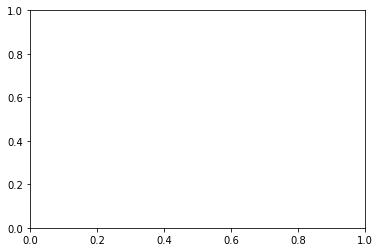

In [23]:
sns.scatterplot(data_with_indices['drought_normalized'].values, data_with_indices['chemicals_normalized'].values, c=kmeans.labels_)
plt.grid()

In [ ]:
LABEL_COLOR_MAP = {0: 'r',
                   1: 'g',
                   2: 'b'}

label_color = [LABEL_COLOR_MAP[l] for l in kmeans.labels_]
plt.scatter(data_with_indices['drought_normalized'].values, data_with_indices['chemicals_normalized'].values, c=label_color)
plt.grid()

In [ ]:
data_with_indices[['chemicals', 'drought']].corr()

In [ ]:
sns.scatterplot(data_with_indices['chemicals'].values, data_with_indices['drought'].values)
plt.grid()

## Regression chemicals vs. industry total revenue

In [60]:
data_industry_occupation = pd.read_csv("industry_occupation.csv", encoding="latin1")
data_industry_earnings = pd.read_csv("earnings.csv", encoding="latin1")

In [61]:
data_industry_earnings = data_industry_earnings[data_industry_earnings['year'] == 2016]
data_industry_occupation = data_industry_occupation[data_industry_occupation['year'] == 2016]

In [62]:
data_industry_occupation = data_industry_occupation.set_index(data_industry_occupation['fips'])
data_industry_earnings = data_industry_earnings.set_index(data_industry_earnings['fips'])

In [30]:
sector_corres = {'agri_fish_hunt': ['agriculture'],
                #'mining_quarrying_oilgas_extract': ['mining'],
                'construction': ['construction'],
                'manufacturing': ['manufacturing'],
                'wholesale_trade': ['wholesale_trade'],
                'retail_trade': ['retail_trade'],
                'transport_warehouse_utilities': ['transport_utilities'],
                'information': ['information'],
                'fin_ins_realest': ['finance_insurance_realestate'],
                'total_prof_sci_mgmt_admin': ['prof_scientific_waste', 'public_admin'],
                'total_edu_health_social': ['edu_health'],
                'total_arts_ent_acc_food': ['arts_recreation'],
                'other_ser': ['other']}

In [31]:
for sector in sector_corres:
    data_industry_earnings[sector] = data_industry_earnings[sector].str.replace(',','')
    data_industry_earnings[sector] = data_industry_earnings[sector].astype(float)

AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

In [34]:
data_sectors = pd.DataFrame()
for sector_earnings in sector_corres:
        print(sector_earnings)
        data_sectors[sector_earnings] = data_industry_earnings[sector_earnings] * data_industry_occupation[sector_corres[sector_earnings][0]]
        for supp_sector in sector_corres[sector_earnings][1:]:
            print('supp', supp_sector)
            data_sectors[sector_earnings] = data_industry_earnings[sector_earnings] * data_industry_occupation[supp_sector]

agri_fish_hunt
construction
manufacturing
wholesale_trade
retail_trade
transport_warehouse_utilities
information
fin_ins_realest
total_prof_sci_mgmt_admin
supp public_admin
total_edu_health_social
total_arts_ent_acc_food


TypeError: ufunc 'multiply' did not contain a loop with signature matching types dtype('<U32') dtype('<U32') dtype('<U32')

In [148]:
sectors_occupation = ['agriculture', 'construction', 'manufacturing', 'wholesale_trade', 'retail_trade', 'transport_utilities', 'information', 'finance_insurance_realestate', 'prof_scientific_waste', 'edu_health', 'arts_recreation', 'other', 'public_admin']
industry_occ_pop = data_industry_occupation[sectors_occupation]
industry_occ_pop['chemicals'] = chemicals_index
industry_occ_pop['total_employed'] = data_industry_occupation['total_employed']
industry_occ_pop = industry_occ_pop.dropna()

for col in sectors_occupation:
    industry_occ_pop[col] = 100. * industry_occ_pop[col]/industry_occ_pop['total_employed']

X = industry_occ_pop[sectors_occupation]
Y = industry_occ_pop['chemicals']

/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [83]:
H = lgb.LGBMRegressor()
H.fit(X, Y)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

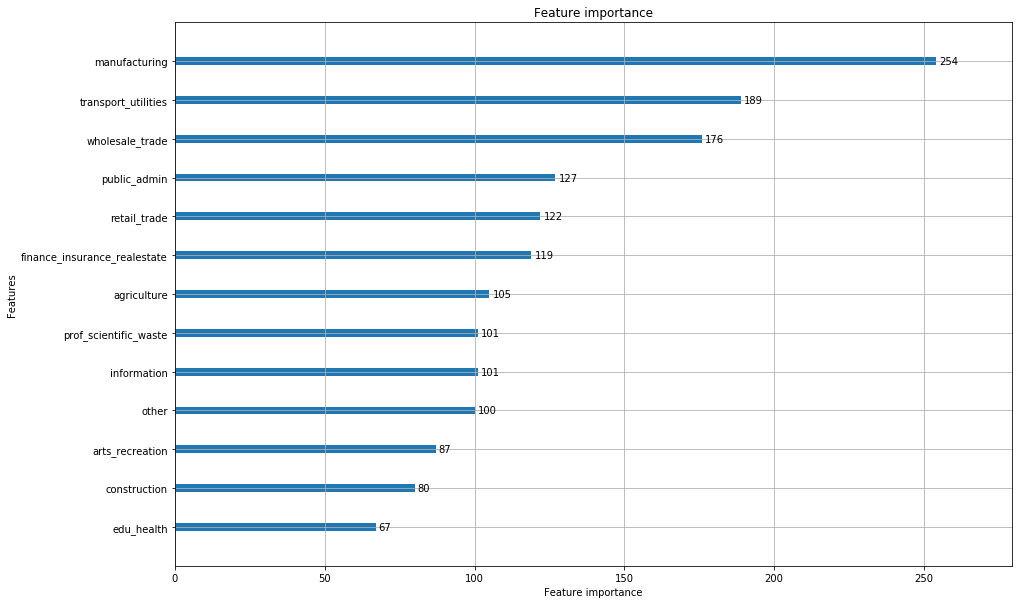

In [84]:
lgb.plot_importance(H)

In [149]:
sectors_occupation

['agriculture',
 'construction',
 'manufacturing',
 'wholesale_trade',
 'retail_trade',
 'transport_utilities',
 'information',
 'finance_insurance_realestate',
 'prof_scientific_waste',
 'edu_health',
 'arts_recreation',
 'other',
 'public_admin']

In [150]:
# S = StandardScaler()
# X = S.fit_transform(X.values)

In [151]:
L = Ridge()
L.fit(X, Y.values.reshape(-1,1))

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

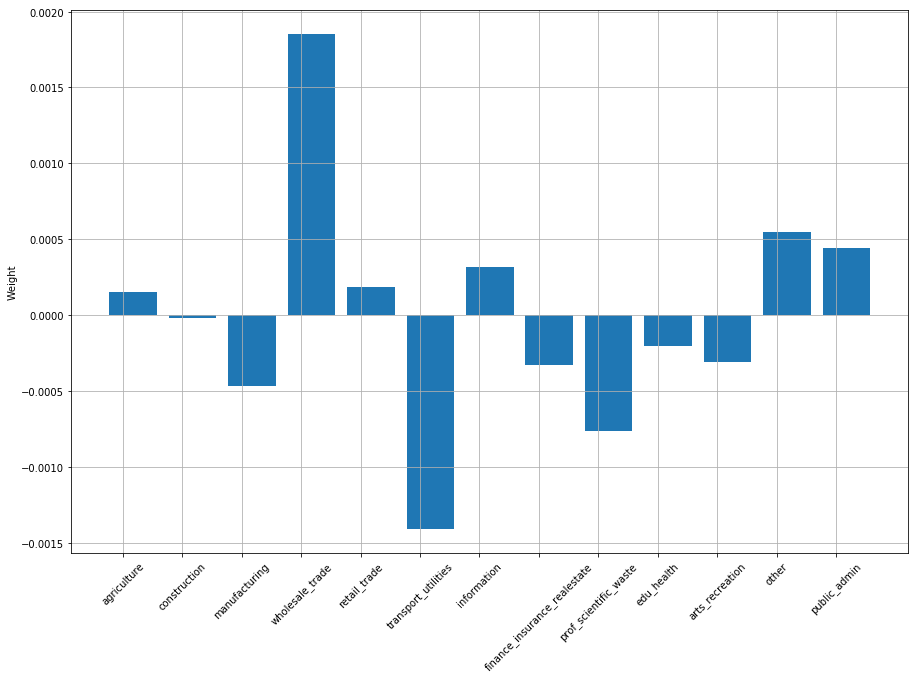

In [152]:
ind = np.arange(len(L.coef_.flatten()))
width = 0.35
fig, ax = plt.subplots()
ax.bar(ind+width, L.coef_.flatten())
ax.set_xticks(ind+width/2.)
ax.set_xticklabels(sectors_occupation)
plt.xticks(rotation=45)
plt.grid()
plt.ylabel("Weight")
plt.show()

## Regression sur les earnings

In [135]:
data_industry_earnings.columns

Index(['geo_id', 'fips', 'county', 'total_med', 'total_agri_fish_mine',
       'agri_fish_hunt', 'mining_quarrying_oilgas_extract', 'construction',
       'manufacturing', 'wholesale_trade', 'retail_trade',
       'transport_warehouse_utilities', 'transport_warehouse', 'utilities',
       'information', 'fin_ins_realest', 'fin_ins', 'realest_rent_lease',
       'total_prof_sci_mgmt_admin', 'prof_sci_tech', 'mgmt', 'admin_sup',
       'total_edu_health_social', 'edu_serv', 'health_social',
       'total_arts_ent_acc_food', 'arts_ent_rec', 'acc_food_serv', 'other_ser',
       'pub_admin', 'year'],
      dtype='object')

In [ ]:
sectors_earnings = ['county', 'total_med', 'total_agri_fish_mine', 'agri_fish_hunt', 'mining_quarrying_oilgas_extract', 'construction', 'manufacturing', 'wholesale_trade', 'retail_trade', 'transport_warehouse_utilities', 'transport_warehouse', 'utilities', 'information', 'fin_ins_realest', 'fin_ins', 'realest_rent_lease', 'total_prof_sci_mgmt_admin', 'prof_sci_tech', 'mgmt', 'admin_sup', 'total_edu_health_social', 'edu_serv', 'health_social', 'total_arts_ent_acc_food', 'arts_ent_rec', 'acc_food_serv', 'other_ser', 'pub_admin']
industry_earnings = data_industry_occupation[sectors_occupation]
industry_earnings['chemicals'] = chemicals_index
industry_earnings['total_med'] = data_industry_earnings['total_med']
industry_earnings = industry_earnings.dropna()

# for col in sectors_occupation:
#     industry_occ_pop[col] = 100. * industry_occ_pop[col]/industry_occ_pop['total_employed']

X = industry_occ_pop[sectors_occupation]
Y = industry_occ_pop['chemicals']